In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

In [2]:
from zipfile import ZipFile

zip_file = ZipFile('cc_fraud.zip')
df = pd.read_csv(zip_file.open('fraudTrain.csv'))
df.head(1)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0


In [3]:
df.shape

(1296675, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
df = df.drop(columns=['Unnamed: 0'])
df.head(1)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0


In [6]:
df.trans_date_trans_time = pd.to_datetime(df.trans_date_trans_time)
df.trans_date_trans_time.dtype

dtype('<M8[ns]')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [8]:
# Create a function to plot resampled data
def plot_resample(X, y, X_res, y_res, method):    
    # Create subplots
    fig, axes = plt.subplot_mosaic([['a', 'b'], ['c', 'd']])
	# Generate scatterplots of first two features for inspection
    sns.scatterplot(x=X.iloc[y.values == 0, 0], y=X.iloc[y.values == 0, 1], alpha=0.10, ax=axes['a'])
    sns.scatterplot(x=X.iloc[y.values == 1, 0], y=X.iloc[y.values == 1, 1], alpha=0.10, ax=axes['a'])
    sns.scatterplot(x=X_res.iloc[y_res.values == 0, 0], y=X_res.iloc[y_res.values == 0, 1], alpha=0.10, ax=axes['b'])
    sns.scatterplot(x=X_res.iloc[y_res.values == 1, 0], y=X_res.iloc[y_res.values == 1, 1], alpha=0.10, ax=axes['b'])
    sns.countplot(y=y, ax=axes['c'])
    sns.countplot(y=y_res, ax=axes['d'])
    # Set titles and show plot
    plt.suptitle(method + ' Outcomes')
    axes['a'].title.set_text('Original Data')
    axes['b'].title.set_text(method + ' Data')
    axes['c'].title.set_text('Original Class Proportions')
    axes['d'].title.set_text(method + ' Class Proportions')
    plt.tight_layout()
    plt.show()

In [9]:
def get_target_and_features(df):
    target = df.columns.to_list()[-1:]
    features = df.columns.to_list()[:-1]
    return target,features

In [10]:
target,features = get_target_and_features(df)
target

['is_fraud']

In [11]:
def train_val(df):
    y = df[target]
    x = df[features]
    x_train, x_validate, y_train, y_validate = train_test_split(x,y,test_size=.30, random_state=42)
    return x_train,x_validate,y_train,y_validate

In [12]:
x_train,x_validate,y_train,y_validate = train_val(df)

In [26]:
xtrain_smote = df[['lat','long','amt','city_pop','merch_lat','merch_long']]
xvalidate_smote = df[['lat','long','amt','city_pop','merch_lat','merch_long']]
xtrain_smote.sample()

,lat,long,amt,city_pop,merch_lat,merch_long
1080437,43.7857,-124.1437,45.19,260,44.094806,-124.594132


In [27]:
y = df[target]
x = df[features]
x_train, x_validate, y_train, y_validate = train_test_split(x,y,test_size=.30, random_state=42)

Text(0.5, 1.0, 'Class Imbalance: is_Fraud')

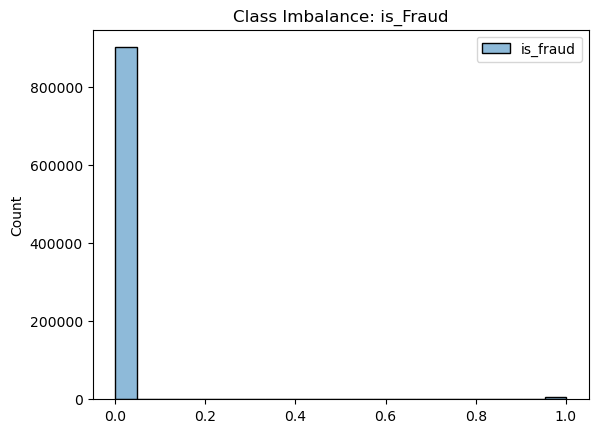

In [28]:
sns.histplot(y_train)
plt.title("Class Imbalance: is_Fraud")

In [29]:
y_train.value_counts()

is_fraud
0           902451
1             5221
Name: count, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
xtrain_resample, ytrain_resample = sm.fit_resample(xtrain_smote, y_train)
xval_resample, yval_resample = sm.fit_resample(xvalidate_smote,y_validate)

ValueError: Found input variables with inconsistent numbers of samples: [1296675, 907672]

In [18]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
xtrain_resample, ytrain_resample = sm.fit_resample(x_train, y_train)
xval_resample, yval_resample = sm.fit_resample(x_validate,y_validate)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:
plot_resample(x_train,y_train,xtrain_resample,ytrain_resample,"SMOTE REBALANCING")